<a href="https://colab.research.google.com/github/Ali-Hasan-Khan28/Computer-Vision/blob/main/Lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import random

# Define the path to your dataset directory
dataset_dir = '/content/drive/MyDrive/Colab_Notebooks/Computer Vision Lab/Intel Image Dataset'

# Define the ratio for splitting the data
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Define the path to the directory where you want to store the split data
base_dir = '/content'
os.makedirs(base_dir, exist_ok=True)

# Define the names of the subdirectories for training, validation, and test sets
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the names of the classes
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Split data for each class
for cls in classes:
    cls_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(cls_dir)
    random.shuffle(images)
    num_images = len(images)
    num_train = int(train_ratio * num_images)
    num_val = int(val_ratio * num_images)
    num_test = num_images - num_train - num_val

    # Copy images to the training directory
    for img in images[:num_train]:
        src = os.path.join(cls_dir, img)
        dst = os.path.join(train_dir, cls)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

    # Copy images to the validation directory
    for img in images[num_train:num_train+num_val]:
        src = os.path.join(cls_dir, img)
        dst = os.path.join(val_dir, cls)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

    # Copy images to the test directory
    for img in images[num_train+num_val:]:
        src = os.path.join(cls_dir, img)
        dst = os.path.join(test_dir, cls)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

print("Data splitting completed successfully.")


Data splitting completed successfully.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Load and preprocess validation data
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')


Found 207 images belonging to 1 classes.
Found 25 images belonging to 1 classes.


In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Load pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 16813638 (64.14 MB)
Trainable params: 2098950 (8.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Print the number of samples in the generators
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", validation_generator.samples)

# Verify the number of images in the training and validation directories
train_image_count = sum(len(files) for _, _, files in os.walk(train_dir))
val_image_count = sum(len(files) for _, _, files in os.walk(val_dir))
print("Number of images in training directory:", train_image_count)
print("Number of images in validation directory:", val_image_count)


Number of training samples: 207
Number of validation samples: 25
Number of images in training directory: 207
Number of images in validation directory: 25


In [ ]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Calculate steps per epoch and validation steps
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, validation_generator.samples // validation_generator.batch_size)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps)



Epoch 1/10
6/6 [==============================] - 46s 7s/step - loss: 53.6534 - accuracy: 0.0000e+00 - val_loss: 66.0426 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 36s 6s/step - loss: 69.9410 - accuracy: 0.0000e+00 - val_loss: 78.3798 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 36s 6s/step - loss: 82.8202 - accuracy: 0.0000e+00 - val_loss: 92.9778 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 36s 6s/step - loss: 97.2187 - accuracy: 0.0000e+00 - val_loss: 109.2880 - val_accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 35s 6s/step - loss: 111.8232 - accuracy: 0.0000e+00 - val_loss: 126.3305 - val_accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 36s 6s/step - loss: 131.0579 - accuracy: 0.0000e+00 - val_loss: 141.8425 - val_accuracy: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 36s 6s/step - loss: 147.3517 - accuracy: 0.0000e+00 - val

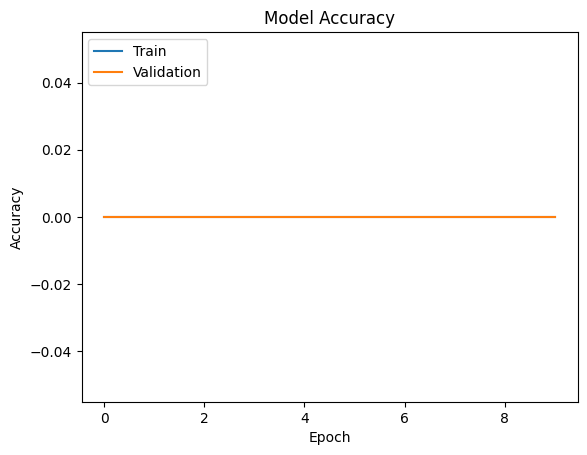

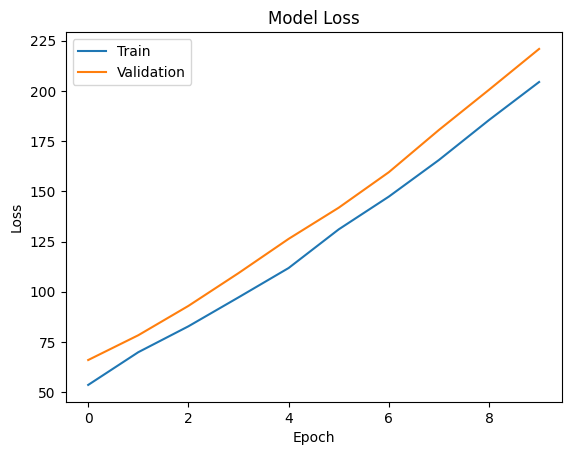

NameError: name 'test_generator' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
